<a href="https://colab.research.google.com/github/gakgenah/deeplearning/blob/main/Tugas_akhir_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
!pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./pima-indians-diabetes.csv')

X_train = df.values
X_train = np.delete(X_train,8, axis=1)

y_train = df['Outcome'].values

df = pd.read_csv('./diabetes_uji.csv')

X_test = df.values
X_test = np.delete(X_test,8,axis=1)

y_test = df['Outcome'].values

In [4]:
from sklearn.preprocessing import MinMaxScaler
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

In [5]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(12, activation='relu', input_shape=(8,)))

model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │             108 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 293 (1.14 KB)

 Trainable params: 293 (1.14 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<ipython-input-12-0df24985eef6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette= colors)


,Count
Labels,
Non-diabetic,100
Diabetic,54


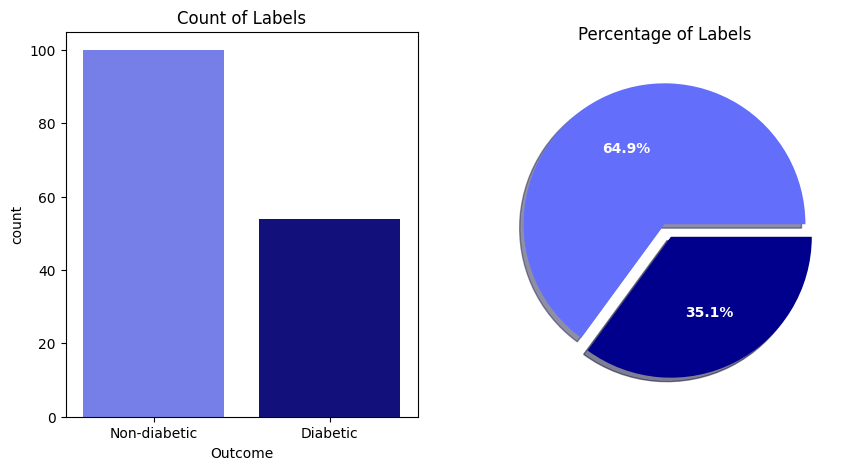

In [12]:
plt.figure(figsize=(10, 5))
colors = ['#636efb', '#01008c']
labels = ['Non-diabetic', 'Diabetic']

# count plot (counts) :
plt.subplot(1, 2, 1)
sns.countplot(x='Outcome', data=df, palette= colors)
plt.title('Count of Labels')
plt.xticks([0, 1], labels)

# value counts in class :
count_0 = df[df['Outcome'] == 0]['Outcome'].count()
count_1 = df[df['Outcome'] == 1]['Outcome'].count()
total_count = count_0 + count_1

# percentage of each value:
percentage_0 = (count_0 / total_count) * 100
percentage_1 = (count_1 / total_count) * 100

# pie chart (percentage):
plt.subplot(1, 2, 2)
plt.pie([percentage_0, percentage_1], labels=labels, autopct='%1.1f%%', colors=colors, shadow=True,
        explode = [0, 0.1],textprops={'color': 'white','weight': 'bold'})
plt.title('Percentage of Labels');

# Summary table:
class_counts = df['Outcome'].value_counts()
label_names = {0: 'Non-diabetic', 1: 'Diabetic'}
Outcome_counts_df = pd.DataFrame({'Labels': class_counts.index.map(label_names),
                                'Count': class_counts.values}
                              ).set_index('Labels')
Outcome_counts_df

In [8]:
model.fit(X_train, y_train, epochs=200, verbose=1, batch_size=20)

y_pred = model.predict(X_test)
y_pred = y_pred >= 0.13

Epoch 1/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6517 - loss: 0.6629
Epoch 2/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6387 - loss: 0.6574
Epoch 3/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6642 - loss: 0.6396
Epoch 4/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6558 - loss: 0.6376
Epoch 5/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6553 - loss: 0.6362
Epoch 6/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6623 - loss: 0.6148
Epoch 7/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6497 - loss: 0.6101
Epoch 8/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6629 - loss: 0.5918
Epoch 9/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6726 - loss: 0.5921
Epoch 10/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6968 - loss: 0.5728
Epoch 11/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6941 - loss: 0.5549
Epoch 12/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [9]:
from sklearn.metrics import accuracy_score

round(accuracy_score(y_test, y_pred),3)

0.552